<a href="https://colab.research.google.com/github/Tanveer132/Dimensionality-Reduction-Techniques-in-ML/blob/main/FST_Practice_PCA_on_iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Principal Component Analysis

data- iris data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,classification_report

In [2]:
df=pd.read_csv('/content/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##Clean, Encode and Scale data

In [3]:
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [4]:
x=df.drop(columns=['species'])
y=df['species']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [5]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

##fit PCA and find components

In [6]:

pca=PCA()
xtrain=pca.fit_transform(xtrain)
xtest=pca.fit_transform(xtest)

model=LogisticRegression()
model.fit(xtrain,ytrain)

ypred=model.predict(xtest)

In [7]:
print("Accuracy : ",accuracy_score(ytest,ypred))
print("\nReport :\n",classification_report(ytest,ypred))

Accuracy :  0.7666666666666667

Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.46      0.63        13
           2       0.46      1.00      0.63         6

    accuracy                           0.77        30
   macro avg       0.82      0.82      0.75        30
weighted avg       0.89      0.77      0.77        30



In [8]:
pca.components_

array([[ 0.49286296, -0.39673799,  0.5615246 ,  0.5332684 ],
       [-0.47114873, -0.86864889, -0.07155814, -0.13545262],
       [-0.67555659,  0.24994965,  0.12088725,  0.68303349],
       [-0.28058559,  0.15991637,  0.81544824, -0.4803568 ]])

In [9]:
pca.explained_variance_ratio_

array([0.77223038, 0.1654295 , 0.05503624, 0.00730387])

([<matplotlib.axis.XTick at 0x7f480386fb10>,
 [Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3'), Text(0, 0, '4')])

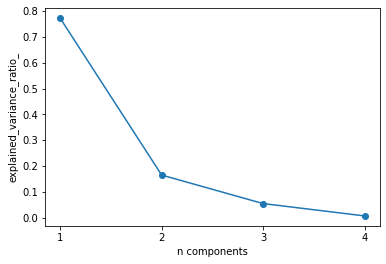

In [10]:
plt.plot(pca.explained_variance_ratio_,marker="o")
plt.xlabel("n components")
plt.ylabel("explained_variance_ratio_")
plt.xticks([0,1,2,3],["1","2","3","4"])


**Conclusion :** principal components are observed at 3

In [11]:
pca=PCA(n_components=3)
xtrain=pca.fit_transform(xtrain)
xtest=pca.fit_transform(xtest)

model=LogisticRegression()
model.fit(xtrain,ytrain)

ypred=model.predict(xtest)

In [12]:
print("Accuracy : ",accuracy_score(ytest,ypred))
print("\nReport :\n",classification_report(ytest,ypred))

Accuracy :  0.7666666666666667

Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.46      0.63        13
           2       0.46      1.00      0.63         6

    accuracy                           0.77        30
   macro avg       0.82      0.82      0.75        30
weighted avg       0.89      0.77      0.77        30

